# Data Science D1PM Predicting Soccer Player Score

by: Muhammad Farhan Zahirsyah

Batch 10

---
### Desctription
Analisis regresi mempelajari bentuk hubungan antara satu atau lebih pengubah/variabel bebas (X) dengan satu pengubah tak bebas (Y). Dalam penelitian pengubah bebas (X) biasanya pengubah yang ditentukan oleh peneliti secara bebas misalnya dosis obat, lama penyimpanan, kadar zat pengawet, umur ternak dan sebagainya. Disamping itu pengubah bebas bisa juga berupa pengubah tak bebasnya, misalnya dalam pengukuran panjang badan dan berat badan sapi, karena panjang badan lebih mudah diukur maka panjang badan dimasukkan kedalam pengubah bebas (X), sedangkan berat badan dimasukkan pengubah tak bebas (Y). (Hidayat, 2012)

FIFA 2022 Dataset


### Objective
- Memprediksi skor pemain


### Problem Statement
- bagaimana cara memprediksi skor pemain


---


## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
print('Pandas Version     :',pd.__version__)
print('Numpy Version      :',np.__version__)
print('Matplotlib Version :',matplotlib.__version__)
print('Seaborn Version    :',sns.__version__)


## Data Loading

In [5]:
df_ori = pd.read_csv('data/Players - Fifa 2022 - Simplified.csv')

In [9]:
df_ori.head()

,Name,Age,Height,Weight,ValueEUR,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Overall
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91


In [10]:
df_ori.shape

(19260, 14)

In [12]:
df = df_ori.copy()

Renaming columns

In [13]:
df.rename(columns={'ValueEUR':'Price','Overall':'Rating'},inplace=True)
df.head()

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19260 entries, 0 to 19259
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               19260 non-null  object
 1   Age                19260 non-null  int64 
 2   Height             19260 non-null  int64 
 3   Weight             19260 non-null  int64 
 4   Price              19260 non-null  int64 
 5   AttackingWorkRate  19260 non-null  object
 6   DefensiveWorkRate  19260 non-null  object
 7   PaceTotal          19260 non-null  int64 
 8   ShootingTotal      19260 non-null  int64 
 9   PassingTotal       19260 non-null  int64 
 10  DribblingTotal     19260 non-null  int64 
 11  DefendingTotal     19260 non-null  int64 
 12  PhysicalityTotal   19260 non-null  int64 
 13  Rating             19260 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 2.1+ MB


Check distribution

In [18]:
df.describe()

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
count,19260.000000,19260.000000,19260.000000,1.926000e+04,19260.000000,19260.000000,19260.000000,19260.000000,19260.0000,19260.000000,19260.000000
mean,25.184683,181.305036,74.950779,2.857652e+06,67.910228,53.535514,57.853323,63.028712,50.0581,64.676584,65.815628
std,4.737340,6.866151,7.066864,7.604532e+06,10.656453,13.813476,9.835494,9.704853,16.3888,9.626269,6.817297
min,16.000000,155.000000,49.000000,0.000000e+00,28.000000,18.000000,25.000000,26.000000,14.0000,29.000000,48.000000
25%,21.000000,176.000000,70.000000,4.750000e+05,62.000000,44.000000,52.000000,58.000000,35.0000,58.000000,62.000000
50%,25.000000,181.000000,75.000000,9.750000e+05,68.000000,56.000000,58.000000,64.000000,54.0000,66.000000,66.000000
75%,29.000000,186.000000,80.000000,2.000000e+06,75.000000,64.000000,65.000000,69.000000,63.0000,72.000000,70.000000
max,54.000000,206.000000,110.000000,1.940000e+08,97.000000,94.000000,93.000000,95.000000,91.0000,92.000000,93.000000


## Exploratory Data Analysis (EDA)

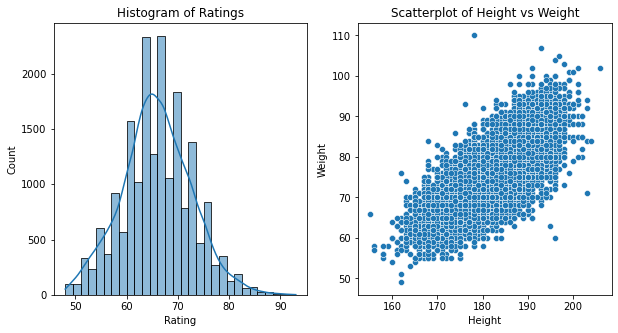

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['Rating'],bins=30,kde=True)
plt.title('Histogram of Ratings')

plt.subplot(1,2,2)
sns.scatterplot(x=df['Height'],y=df['Weight'])
plt.title('Scatterplot of Height vs Weight')
plt.show()

## Data Preprocessing

- Data train : digunakna untuk melatih model
- Data test : untuk menguji
- Data Inference : untuk predict dari dataset awal. ini diambil beberapa dari daataset awal

In [25]:
# Get Data Inference

data_inf = df.sample(10,random_state=17)
data_inf

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
9456,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
6380,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
1970,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
8012,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
13209,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
4544,L. Reis,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
12638,A. Rojas,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
13055,V. Ábrego,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
13796,T. Baldé,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
4641,J. Delgado,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [26]:
# Remove inference state  from dataset

data_train_test = df.drop(data_inf.index)
data_train_test

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65,93
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82,92
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75,91
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77,91
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53,48
19256,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44,48
19257,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56,48
19258,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51,48


In [28]:
# resetting index

data_train_test.reset_index(drop=True,inplace=True)
data_inf.reset_index(drop=True,inplace=True)
data_inf.head()

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,F. Berenguer,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,Lasure,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,G. Plata,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,D. Azcona,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,X. Dziekoński,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63


In [30]:
## Splitting dataset into x and y

x = data_train_test.drop('Rating',axis=1)
y = data_train_test['Rating']
x

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
0,L. Messi,34,170,72,78000000,Medium,Low,85,92,91,95,34,65
1,R. Lewandowski,32,185,81,119500000,High,Medium,78,92,79,85,44,82
2,Cristiano Ronaldo,36,187,83,45000000,High,Low,87,94,80,87,34,75
3,K. Mbappé,22,182,73,194000000,High,Low,97,88,80,92,36,77
4,J. Oblak,28,188,87,112000000,Medium,Medium,87,92,78,90,52,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,S. Black,19,180,75,100000,Medium,Medium,56,27,29,33,48,53
19246,Ma Zhen,23,196,85,50000,Medium,Medium,49,47,45,46,54,44
19247,Yang Haoyu,20,183,77,90000,Medium,Medium,57,26,29,28,51,56
19248,He Siwei,20,174,69,100000,Medium,Medium,61,25,32,32,49,51


In [31]:
# split between train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=17)

print('Train size :',x_train.shape)
print('Test size  :',x_test.shape)

Train size : (15400, 13)
Test size  : (3850, 13)


## Handling outlier

In [34]:
## Handling Outlier

## Handling missing Value

In [35]:
## Handling missing VAlue

In [36]:
# check missing value on x_train
x_train.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [37]:
#check missing value on x_test
x_test.isnull().sum()

Name                 0
Age                  0
Height               0
Weight               0
Price                0
AttackingWorkRate    0
DefensiveWorkRate    0
PaceTotal            0
ShootingTotal        0
PassingTotal         0
DribblingTotal       0
DefendingTotal       0
PhysicalityTotal     0
dtype: int64

In [39]:
#check missing value on y_train
y_train.isnull().sum()

0

In [41]:
#check missing value on y_test
y_test.isnull().sum()

0

## Feature Selection

In [42]:
## display x_train

x_train

,Name,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,Quintana,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,R. Manaj,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,E. Vergani,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,Talles Magno,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,Lee Bum Young,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9529,Ricardo Ferreira,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,Everton,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,Bruno Jordão,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,Lino Essier,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


Karena nama tidak ada hubungannya dnegan 'Rating', maka kolom 'name' ini dapat dihapus. hal ini dibuktikan dengan jika ada nama 'Danu Ronaldo', tidak ada kaitannya dengan 'Chrisiano ronaldo' sehingga sudah pasti nilai rating kedua pemain ini akan berbeda

In [43]:
# drop column name
x_train.drop('Name',axis=1,inplace=True)
x_test.drop('Name',axis=1,inplace=True)
data_inf.drop('Name',axis=1,inplace=True)

x_train

Q:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


In [46]:
# split numerical and categorical columns

num_cols = x_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = x_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns :',num_cols)
print('Categorical Columns :',cat_cols)

Numerical Columns : ['Age', 'Height', 'Weight', 'Price', 'PaceTotal', 'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal']
Categorical Columns : ['AttackingWorkRate', 'DefensiveWorkRate']


In [47]:
x_train_num = x_train[num_cols]
x_train_cat = x_train[cat_cols]

x_test_num = x_test[num_cols]
x_test_cat = x_test[cat_cols]

## Feature Scaling

In [48]:
x_train

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal
9235,19,186,74,1900000,Medium,High,63,50,61,61,65,64
4199,24,182,76,3800000,Medium,Medium,69,72,54,70,28,69
12940,20,186,77,1100000,High,Medium,63,69,51,67,21,54
8147,19,186,70,2600000,High,Medium,85,52,55,76,21,60
15074,32,197,93,160000,Medium,Medium,61,60,59,62,39,58
...,...,...,...,...,...,...,...,...,...,...,...,...
9529,28,190,82,0,Low,Medium,49,32,45,47,69,59
406,25,174,72,28000000,High,Low,86,75,73,86,32,62
13702,22,180,73,900000,Medium,Medium,64,55,60,68,49,60
2191,29,183,77,3500000,Medium,Medium,67,45,68,66,73,79


In [49]:
# Feature Sacling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train_num)
x_train_num_scaled = scaler.transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)

x_train_num_scaled

array([[0.07894737, 0.60784314, 0.43103448, ..., 0.53030303, 0.66233766,
        0.55555556],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.66666667, 0.18181818,
        0.63492063],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.62121212, 0.09090909,
        0.3968254 ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.63636364, 0.45454545,
        0.49206349],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.60606061, 0.76623377,
        0.79365079],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.40909091, 0.64935065,
        0.73015873]])

## Feature Encoding

In [52]:
x_train_cat

,AttackingWorkRate,DefensiveWorkRate
9235,Medium,High
4199,Medium,Medium
12940,High,Medium
8147,High,Medium
15074,Medium,Medium
...,...,...
9529,Low,Medium
406,High,Low
13702,Medium,Medium
2191,Medium,Medium


ordinal encoder / label encoder untuk data category ordinal (sd,smp,sma) (lvl1,lvl2,lvl3)

one hot encoding itu untuk data category nominal (Yes/No) (jkt,bdg,sby)

In [51]:
# feature encoding using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(x_train_cat)

x_train_cat_enc = encoder.transform(x_train_cat)
x_test_cat_enc = encoder.transform(x_test_cat)
x_train_cat_enc

array([[2., 0.],
       [2., 2.],
       [0., 2.],
       ...,
       [2., 2.],
       [2., 2.],
       [1., 2.]])

## COncat between numerical and categorical columns

In [53]:
# concate numerical and categorical columns

x_train_final  = np.concatenate((x_train_num_scaled,x_train_cat_enc),axis=1)
x_test_final  = np.concatenate((x_test_num_scaled,x_test_cat_enc),axis=1)
x_train_final

array([[0.07894737, 0.60784314, 0.43103448, ..., 0.55555556, 2.        ,
        0.        ],
       [0.21052632, 0.52941176, 0.46551724, ..., 0.63492063, 2.        ,
        2.        ],
       [0.10526316, 0.60784314, 0.48275862, ..., 0.3968254 , 0.        ,
        2.        ],
       ...,
       [0.15789474, 0.49019608, 0.4137931 , ..., 0.49206349, 2.        ,
        2.        ],
       [0.34210526, 0.54901961, 0.48275862, ..., 0.79365079, 2.        ,
        2.        ],
       [0.21052632, 0.60784314, 0.53448276, ..., 0.73015873, 1.        ,
        2.        ]])

In [54]:
# display as dataframe

x_train_final_df = pd.DataFrame(x_train_final,columns=num_cols+cat_cols)
x_train_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.078947,0.607843,0.431034,0.009794,0.507246,0.421053,0.529412,0.530303,0.662338,0.555556,2.0,0.0
1,0.210526,0.529412,0.465517,0.019588,0.594203,0.710526,0.426471,0.666667,0.181818,0.634921,2.0,2.0
2,0.105263,0.607843,0.482759,0.005670,0.507246,0.671053,0.382353,0.621212,0.090909,0.396825,0.0,2.0
3,0.078947,0.607843,0.362069,0.013402,0.826087,0.447368,0.441176,0.757576,0.090909,0.492063,0.0,2.0
4,0.421053,0.823529,0.758621,0.000825,0.478261,0.552632,0.500000,0.545455,0.324675,0.460317,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0.315789,0.686275,0.568966,0.000000,0.304348,0.184211,0.294118,0.318182,0.714286,0.476190,1.0,2.0
15396,0.236842,0.372549,0.396552,0.144330,0.840580,0.750000,0.705882,0.909091,0.233766,0.523810,0.0,1.0
15397,0.157895,0.490196,0.413793,0.004639,0.521739,0.486842,0.514706,0.636364,0.454545,0.492063,2.0,2.0
15398,0.342105,0.549020,0.482759,0.018041,0.565217,0.355263,0.632353,0.606061,0.766234,0.793651,2.0,2.0


## Model Definition

In [55]:
# training using linear regression

from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()


metriks yang dipakai dalam kasus ini adlah `MAE` (Mean Absolute Error)

## 7 model training

In [56]:
# train the model
model_lr.fit(x_train_final,y_train)

LinearRegression()

## 8 model evaluation

In [57]:
# predict the test data

y_pred_train = model_lr.predict(x_train_final)
y_pred_test = model_lr.predict(x_test_final)

In [58]:
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error on Train Data :',mean_absolute_error(y_train,y_pred_train))
print('Mean Absolute Error on Test Data :',mean_absolute_error(y_test,y_pred_test))

Mean Absolute Error on Train Data : 2.361042732685607
Mean Absolute Error on Test Data : 2.349492009480913


## 9 Model Inference

In [60]:
data_inf

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating
0,32,180,70,675000,High,Low,73,63,65,67,48,68,66
1,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69
2,20,178,65,9500000,High,Low,85,66,65,79,43,64,74
3,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67
4,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63
5,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71
6,25,170,67,625000,High,Medium,73,61,55,66,39,48,63
7,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63
8,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62
9,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70


In [61]:
# split between num and cat

data_inf_num = data_inf[num_cols]
data_inf_cat = data_inf[cat_cols]

In [62]:

# feature scaling and encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = encoder.transform(data_inf_cat)

In [64]:
# merge numerical and categorical columns

data_inf_final = np.concatenate((data_inf_num_scaled,data_inf_cat_enc),axis=1)
data_inf_final_df = pd.DataFrame(data_inf_final,columns=num_cols+cat_cols)
data_inf_final_df

,Age,Height,Weight,Price,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,AttackingWorkRate,DefensiveWorkRate
0,0.421053,0.490196,0.362069,0.003479,0.652174,0.592105,0.588235,0.621212,0.441558,0.619048,0.0,1.0
1,0.289474,0.392157,0.448276,0.007732,0.623188,0.342105,0.485294,0.530303,0.649351,0.746032,2.0,2.0
2,0.105263,0.450980,0.275862,0.048969,0.826087,0.631579,0.588235,0.803030,0.376623,0.555556,0.0,1.0
3,0.552632,0.568627,0.551724,0.000567,0.565217,0.592105,0.617647,0.636364,0.428571,0.634921,2.0,2.0
4,0.026316,0.647059,0.500000,0.005670,0.492754,0.605263,0.544118,0.560606,0.246753,0.571429,2.0,2.0
5,0.131579,0.450980,0.500000,0.021649,0.681159,0.513158,0.617647,0.712121,0.688312,0.666667,2.0,0.0
6,0.236842,0.294118,0.310345,0.003222,0.652174,0.565789,0.441176,0.606061,0.324675,0.301587,0.0,2.0
7,0.210526,0.411765,0.344828,0.003995,0.492754,0.605263,0.352941,0.606061,0.337662,0.444444,2.0,2.0
8,0.078947,0.529412,0.327586,0.004639,0.608696,0.236842,0.382353,0.500000,0.597403,0.460317,2.0,2.0
9,0.315789,0.411765,0.379310,0.008247,0.695652,0.592105,0.558824,0.712121,0.350649,0.555556,2.0,2.0


In [65]:
# predict inference set

y_pred_inf = model_lr.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf,columns=['Rating - Prediction'])
y_pred_inf_df

,Rating - Prediction
0,69.322716
1,68.123269
2,71.517242
3,70.422103
4,62.666168
5,72.016785
6,61.816243
7,62.879710
8,61.632516
9,68.507348


In [67]:
# concat inference set with prediction

pd.concat([data_inf,y_pred_inf_df],axis=1)

,Age,Height,Weight,Price,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Rating,Rating - Prediction
0,32,180,70,675000,High,Low,73,63,65,67,48,68,66,69.322716
1,27,175,75,1500000,Medium,Medium,71,44,58,61,64,76,69,68.123269
2,20,178,65,9500000,High,Low,85,66,65,79,43,64,74,71.517242
3,37,184,81,110000,Medium,Medium,67,63,67,68,47,69,67,70.422103
4,17,188,78,1100000,Medium,Medium,62,64,62,63,33,65,63,62.666168
5,21,178,78,4200000,Medium,High,75,57,67,73,67,71,71,72.016785
6,25,170,67,625000,High,Medium,73,61,55,66,39,48,63,61.816243
7,24,176,69,775000,Medium,Medium,62,64,49,66,40,57,63,62.879710
8,19,182,68,900000,Medium,Medium,70,36,51,59,60,58,62,61.632516
9,28,176,71,1600000,Medium,Medium,76,63,63,73,41,64,70,68.507348


## Pengambilan kesimpulan

In [69]:
intercept = model_lr.intercept_
slope = model_lr.coef_

print('Intercept :', intercept)
print('Slope :', slope)

Intercept : 36.198928005411986
Slope : [ 7.66111977  2.52233197  1.419032   38.92962425  2.811425    2.60425313
  2.42803119 20.45000636  7.73316122 11.71164183 -0.16229389 -0.15990455]


In [70]:
# Display COlumns name

x_train.columns.tolist()

['Age',
 'Height',
 'Weight',
 'Price',
 'AttackingWorkRate',
 'DefensiveWorkRate',
 'PaceTotal',
 'ShootingTotal',
 'PassingTotal',
 'DribblingTotal',
 'DefendingTotal',
 'PhysicalityTotal']